자동 미분과 선형회귀 실습 Differential & Linear Regression

1. 자동 미분

In [1]:
import tensorflow as tf

In [2]:
# 미분

w = tf.Variable(2.)

def f(w):
    y = w**2
    z = 2 * y + 5
    return z

In [3]:
# gradients를 출력하여 w에 대해 미분한 값이 저장된 것을 확인

with tf.GradientTape() as tape:   # tape_gradient() : 자동 미분 수행
    z = f(w)
    
gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


2. 자동 미분을 이용한 선형 회귀 구현

In [5]:
# 학습될 가중치 변수 W, b 선언 : 4와 1로 초기화

W = tf.Variable(4.0)
b = tf.Variable(1.0)

In [6]:
# 가설을 함수로 선언

@tf.function
def hypothesis(x):
  return W*x + b

In [7]:
# 임의 값을 넣어 확인

x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [8]:
# 평균 제곱 오차를 손실 함수로 정의

@tf.function
def mse_loss(y_pred, y):
    # 두 개의 차이값을 제곱하여 평균을 구함
    return tf.reduce_mean(tf.square(y_pred - y))

In [9]:
# 데이터 준비

X = [1,2,3,4,5,6,7,8,9]  # 공부하는 시간
y = [11,22,33,44,53,66,77,87,95]  # 각 공부하는 시간에 맵핑되는 성적

In [10]:
# 옵티마이저 : 경사 하강법, 학습률(learning rate) = 0.01

optimizer = tf.optimizers.SGD(0.01)

In [11]:
# 경사 하강법 300번 수행

for i in range(301):
  with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = hypothesis(X)

    # 평균 제곱 오차를 계산
    cost = mse_loss(y_pred, y)

  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [W, b])

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [W, b]))

  if i % 10 == 0:
    print("epoch : {:3} | W의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, W.numpy(), b.numpy(), cost))

epoch :   0 | W의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | W의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | W의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | W의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | W의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | W의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | W의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | W의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | W의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | W의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | W의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | W의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | W의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | W의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | W의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | W의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [12]:
# 학습된 W와 b의 값에 대해서 임의 입력을 넣었을 경우의 예측값을 확인

x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


3. 케라스로 구현하는 선형 회귀

In [15]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [16]:
X = [1,2,3,4,5,6,7,8,9]  # 공부하는 시간
y = [11,22,33,44,53,66,77,87,95]  # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 입력 x의 차원은 1, 출력 y의 차원도 1. 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(X,y, batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
9/9 [==============================] - 1s 2ms/step - loss: 499.0804 - mse: 499.0804
Epoch 2/300
9/9 [==============================] - 0s 2ms/step - loss: 2.2726 - mse: 2.2726
Epoch 3/300
9/9 [==============================] - 0s 2ms/step - loss: 2.2507 - mse: 2.2507
Epoch 4/300
9/9 [==============================] - 0s 2ms/step - loss: 2.2297 - mse: 2.2297
Epoch 5/300
9/9 [==============================] - 0s 2ms/step - loss: 2.2096 - mse: 2.2096
Epoch 6/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1903 - mse: 2.1903
Epoch 7/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1718 - mse: 2.1718
Epoch 8/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1541 - mse: 2.1541
Epoch 9/300
9/9 [==============================] - 0s 4ms/step - loss: 2.1371 - mse: 2.1371
Epoch 10/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1208 - mse: 2.1208
Epoch 11/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1

9/9 [==============================] - 0s 2ms/step - loss: 1.7251 - mse: 1.7251
Epoch 90/300
9/9 [==============================] - 0s 3ms/step - loss: 1.7242 - mse: 1.7242
Epoch 91/300
9/9 [==============================] - 0s 2ms/step - loss: 1.7233 - mse: 1.7233
Epoch 92/300
9/9 [==============================] - 0s 2ms/step - loss: 1.7225 - mse: 1.7225
Epoch 93/300
9/9 [==============================] - 0s 2ms/step - loss: 1.7217 - mse: 1.7217
Epoch 94/300
9/9 [==============================] - 0s 2ms/step - loss: 1.7210 - mse: 1.7210
Epoch 95/300
9/9 [==============================] - 0s 2ms/step - loss: 1.7202 - mse: 1.7202
Epoch 96/300
9/9 [==============================] - 0s 2ms/step - loss: 1.7195 - mse: 1.7195
Epoch 97/300
9/9 [==============================] - 0s 1ms/step - loss: 1.7188 - mse: 1.7188
Epoch 98/300
9/9 [==============================] - 0s 2ms/step - loss: 1.7182 - mse: 1.7182
Epoch 99/300
9/9 [==============================] - 0s 2ms/step - loss: 1.7175 - ms

9/9 [==============================] - 0s 2ms/step - loss: 1.7002 - mse: 1.7002
Epoch 177/300
9/9 [==============================] - 0s 2ms/step - loss: 1.7001 - mse: 1.7001
Epoch 178/300
9/9 [==============================] - 0s 2ms/step - loss: 1.7001 - mse: 1.7001
Epoch 179/300
9/9 [==============================] - 0s 2ms/step - loss: 1.7000 - mse: 1.7000
Epoch 180/300
9/9 [==============================] - 0s 1ms/step - loss: 1.7000 - mse: 1.7000
Epoch 181/300
9/9 [==============================] - 0s 1ms/step - loss: 1.6999 - mse: 1.6999
Epoch 182/300
9/9 [==============================] - 0s 1ms/step - loss: 1.6999 - mse: 1.6999
Epoch 183/300
9/9 [==============================] - 0s 2ms/step - loss: 1.6999 - mse: 1.6999
Epoch 184/300
9/9 [==============================] - 0s 2ms/step - loss: 1.6998 - mse: 1.6998
Epoch 185/300
9/9 [==============================] - 0s 2ms/step - loss: 1.6998 - mse: 1.6998
Epoch 186/300
9/9 [==============================] - 0s 2ms/step - loss: 1

9/9 [==============================] - 0s 2ms/step - loss: 1.6988 - mse: 1.6988
Epoch 264/300
9/9 [==============================] - 0s 2ms/step - loss: 1.6988 - mse: 1.6988
Epoch 265/300
9/9 [==============================] - 0s 2ms/step - loss: 1.6988 - mse: 1.6988
Epoch 266/300
9/9 [==============================] - 0s 2ms/step - loss: 1.6988 - mse: 1.6988
Epoch 267/300
9/9 [==============================] - 0s 3ms/step - loss: 1.6988 - mse: 1.6988
Epoch 268/300
9/9 [==============================] - 0s 3ms/step - loss: 1.6988 - mse: 1.6988
Epoch 269/300
9/9 [==============================] - 0s 2ms/step - loss: 1.6988 - mse: 1.6988
Epoch 270/300
9/9 [==============================] - 0s 2ms/step - loss: 1.6988 - mse: 1.6988
Epoch 271/300
9/9 [==============================] - 0s 2ms/step - loss: 1.6988 - mse: 1.6988
Epoch 272/300
9/9 [==============================] - 0s 3ms/step - loss: 1.6988 - mse: 1.6988
Epoch 273/300
9/9 [==============================] - 0s 2ms/step - loss: 1

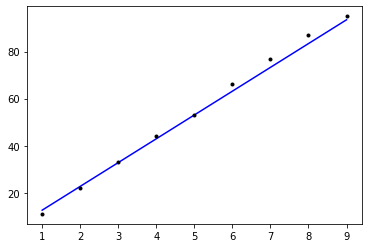

In [17]:
# 최종적으로 선택된 오차를 최소화하는 직선 그래프 plot

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X, model.predict(X), 'b', X,y, 'k.')

In [ ]:
# 